## Building a Dashboard based on data from the SQLite database

Link to the dashboard: https://public.tableau.com/app/profile/bolik23/viz/NPS_16659296887410/DashboardFinal?publish=yes 

In [3]:
#importing libraries
from sqlalchemy import create_engine #to connect to the database
import pandas as pd #to work with data
import plotly.express as px# to plot (if necessary)
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
##creating a path to connect to the database
#path_to_db = r"\Users\MacBook\Documents\Yandex_analitik\Yandex_Projects\Yandex_project_2 Telecom\telecomm_csi.db"
path_to_db = '/datasets/telecomm_csi.db'
engine = create_engine(f'sqlite:///{path_to_db}', echo = False)

In [5]:
#creating a format for uploading data from the database in SQL
query = '''

SELECT user.user_id AS user_id,
        user.lt_day AS lt_day,

        CASE 
            WHEN lt_day > 365 THEN 0
            WHEN lt_day <= 365 THEN 1
        END is_new,

        user.age AS age,
        REPLACE (REPLACE (user.gender_segment, 1.0, 'женщины'), 0.0, 'мужчины') AS gender_segment,
        REPLACE(os_name, 'unknown', 'OTHER') AS os_name,
        user.cpe_type_name AS cpe_type_name,
        location.country AS country,
        location.city AS city,
        SUBSTR(age_segment.title, 4, 10) AS age_segment,
        SUBSTR(traffic_segment.title, 4, 10) AS traffic_segment,
        SUBSTR(lifetime_segment.title, 4,10) AS lifetime_segment, 
        user.nps_score AS nps_score,

        CASE 
            WHEN nps_score >= 9 THEN 'cторонники'
            WHEN nps_score BETWEEN 7 AND 8 THEN 'нейтралы'
            WHEN nps_score <= 6 THEN 'критики'
        END nps_group


FROM user
    INNER JOIN location ON user.location_id = location.location_id
    INNER JOIN age_segment ON user.age_gr_id = age_segment.age_gr_id
    INNER JOIN traffic_segment ON user.tr_gr_id = traffic_segment.tr_gr_id
    INNER JOIN lifetime_segment ON user.lt_gr_id = lifetime_segment.lt_gr_id
    
WHERE nps_group <> 'OTHER'


'''

In [7]:
#creating a variable where we save the dataframe from the database generated above
table = pd.read_sql(query, engine)

In [5]:
#let's look at the data
pd.options.display.max_columns = None
table.head(5)

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,0,45.0,женщины,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,cторонники
1,A001WF,2344,0,53.0,мужчины,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,cторонники
2,A003Q7,467,0,57.0,мужчины,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,cторонники
3,A004TB,4190,0,44.0,женщины,IOS,SMARTPHONE,Россия,РостовнаДону,35-44,0.1-1,36+,10,cторонники
4,A004XT,1163,0,24.0,мужчины,ANDROID,SMARTPHONE,Россия,Рязань,16-24,5-10,36+,10,cторонники


lifetime_segment              1     13-24         2     25-36         3  \
gender_segment age_segment                                                
женщины        16-24        NaN -0.634409 -0.617761 -0.635873 -0.631356   
               25-34        NaN -0.644232 -0.660501 -0.649743 -0.599734   
               35-44       -1.0 -0.641535 -0.586260 -0.643478 -0.624542   
               45-54        NaN -0.642596 -0.627615 -0.637224 -0.554913   
               55-64        NaN -0.636106 -0.492754 -0.648077 -0.629032   
               66 +         NaN -0.641104 -0.642857 -0.632653 -0.571429   
               n/a          NaN  0.000000       NaN -1.000000       NaN   
               до 16        NaN -0.617647 -0.666667 -0.818182 -1.000000   
мужчины        16-24        NaN -0.605905 -0.630094 -0.643630 -0.547529   
               25-34        0.0 -0.665972 -0.652456 -0.658537 -0.646552   
               35-44       -1.0 -0.625023 -0.649123 -0.647960 -0.611006   
               45-54        NaN -0.593592 -0.533333 -0.608632 -0.549020   
               55-64        NaN -0.600499 -0.593220 -0.611625 -0.750000   
               66 +         NaN -0.552174 -0.666667 -0.647059 -0.666667   
               n/a          0.0 -1.000000 -1.000000 -1.000000       NaN   
               до 16        NaN -0.458333 -0.666667 -0.543478 -0.800000   

lifetime_segment                 36+       4-6      7-12  
gender_segment age_segment                                
женщины        16-24       -0.668549 -0.580407 -0.570975  
               25-34       -0.671358 -0.628445 -0.633696  
               35-44       -0.652918 -0.596677 -0.625705  
               45-54       -0.639517 -0.642241 -0.609827  
               55-64       -0.664642 -0.678363 -0.600575  
               66 +        -0.654031 -0.653061 -0.636364  
               n/a         -0.800000       NaN       NaN  
               до 16       -0.714286 -0.555556 -0.818182  
мужчины        16-24       -0.667709 -0.580205 -0.602927  
               25-34       -0.675958 -0.626632 -0.637789  
               35-44       -0.650013 -0.598406 -0.611611  
               45-54       -0.626046 -0.583893 -0.582876  
               55-64       -0.609063 -0.657143 -0.580858  
               66 +        -0.573290 -0.531250 -0.556962  
               n/a         -0.818182 -0.500000 -1.000000  
               до 16       -0.666667 -0.600000 -0.619048

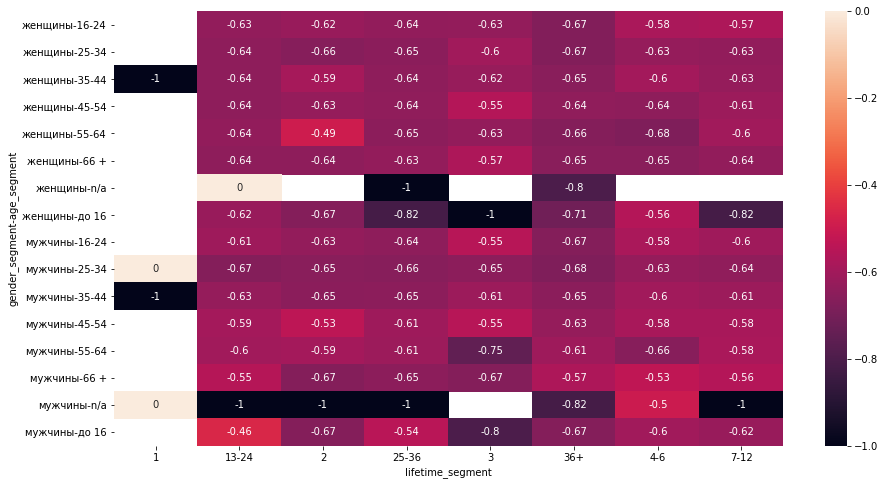

In [11]:
#heatmap
d = table.assign(total_nps=lambda row: row['nps_group'].map({'сторонники': 1, 'нейтралы': 0, 'критики': -1}))\
  .pivot_table(index=['gender_segment', 'age_segment'], columns=['lifetime_segment'], values='total_nps', aggfunc='mean')
display(d)
plt.figure(figsize=(15,8))
sns.heatmap(d, annot=True);